In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from datetime import datetime, timedelta

In [48]:
#reading in the CSV file
df = pd.read_csv('NYPD_ARREST_Data_2023.csv')
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042


In [49]:
df.tail()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
170090,270955727,07/07/2023,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601002,F,B,52,0,25-44,M,BLACK,1017273,255924,40.869067,-73.880600
170091,273117887,08/18/2023,681,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,B,47,0,25-44,F,BLACK,1026480,262584,40.887314,-73.847272
170092,274301006,09/13/2023,969,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,S,122,0,25-44,M,WHITE HISPANIC,951857,161569,40.610087,-74.116666
170093,269912233,06/15/2023,490,"STOLEN PROPERTY 3,POSSESSION",232.0,POSSESSION OF STOLEN PROPERTY,PL 1654000,M,K,62,0,25-44,M,BLACK,983469,157947,40.600204,-74.002812
170094,272045762,07/28/2023,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,K,84,0,18-24,M,BLACK,988491,195163,40.702353,-73.984704


In [50]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude'],
      dtype='object')

In [51]:
#How does the number of arrests vary over time? Are there any notable patterns or spikes in arrest rates?
date = pd.date_range(start='2023-1-1', end='2023-7-28', freq='D')
arrests = np.random.randint(0,30, size=(len(date)))
arrest_data = pd.DataFrame(data={'timestamp': date, 'arrests': arrests})
print(arrest_data.head())

   timestamp  arrests
0 2023-01-01       21
1 2023-01-02        8
2 2023-01-03       29
3 2023-01-04       16
4 2023-01-05       14


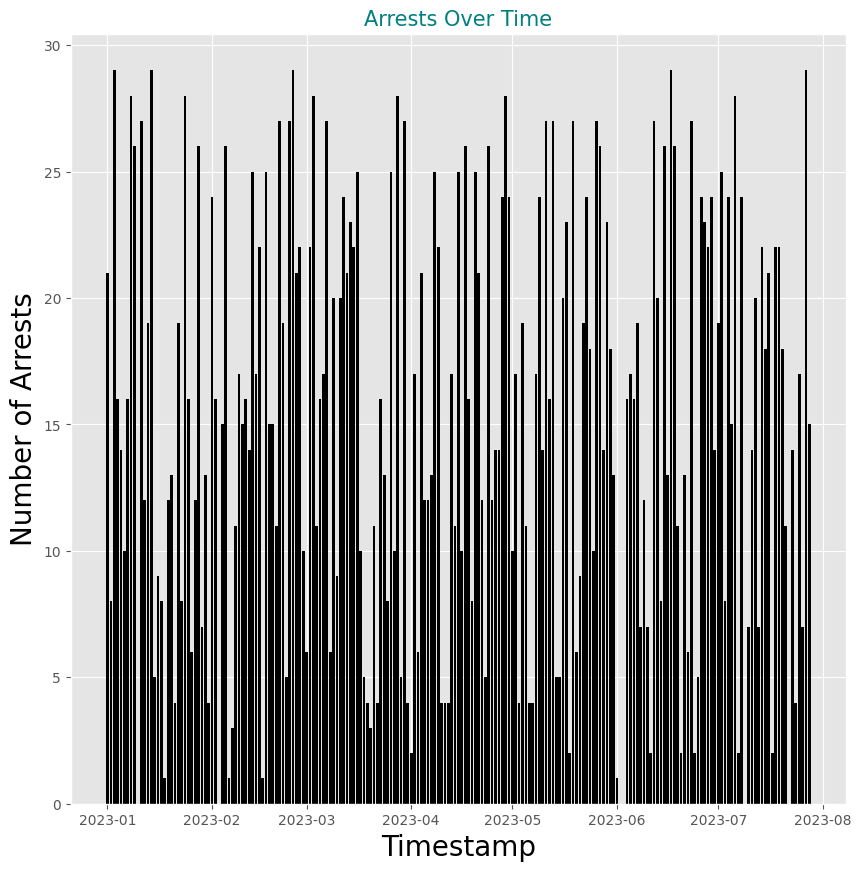

In [52]:
figure = plt.figure(figsize=(10,10))
plt.bar(arrest_data['timestamp'], arrest_data['arrests'],  linestyle='-', color = 'black')
plt.title('Arrests Over Time', color = 'Teal', fontsize = 15)
plt.xlabel('Timestamp', color = 'black', fontsize = 20)
plt.ylabel('Number of Arrests',color = 'black', fontsize = 20)
plt.grid(True)
plt.show()

In [53]:
#What is the distribution of different offenses in the dataset, and which ones are the most prevalent?
OFNS_DESC = ['ROBBERY', 'CHILD, ENDAGERING WELFARE', 'STOLEN PROPERTY', 'TRAFFIC', 'FORGERY']
counts = np.random.randint(0,30, size=len(OFNS_DESC))
columns_and_counts = pd.DataFrame(data={'OFNS_DESC': OFNS_DESC, 'counts': counts})
print(columns_and_counts)

                   OFNS_DESC  counts
0                    ROBBERY      29
1  CHILD, ENDAGERING WELFARE      11
2            STOLEN PROPERTY      19
3                    TRAFFIC       1
4                    FORGERY       0


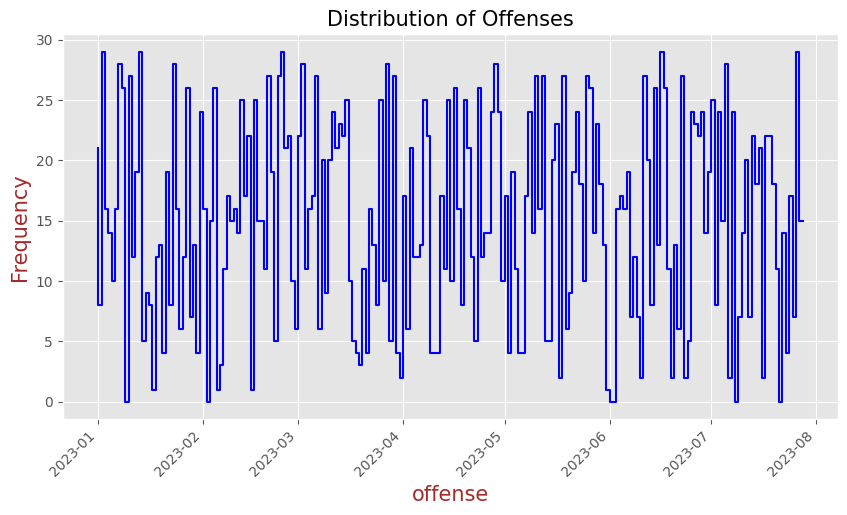

In [54]:
figure = plt.figure(figsize=(10,5))
plt.step(arrest_data.iloc[:, 0], arrest_data.iloc[:, 1], color = 'Blue')
plt.title('Distribution of Offenses', color = 'Black', fontsize = 15)
plt.xlabel('offense', color = 'brown', fontsize = 15)
plt.ylabel('Frequency', color = 'brown', fontsize = 15)
plt.xticks(rotation=45, ha='right')
plt.show()

In [55]:
#Which law codes are most frequently associated with arrests, and how does their distribution look?
LAW_CODE = ['PL 1601002', 'PL 2601001', 'VTL051101A', 'PL 1654000', 'PL 1702500']
counts = np.random.randint(10, 100, size=len(LAW_CODE))
law_code_data = pd.DataFrame(data={'LAW_CODES': LAW_CODE, 'count': counts})
print(law_code_data)

    LAW_CODES  count
0  PL 1601002     63
1  PL 2601001     31
2  VTL051101A     66
3  PL 1654000     50
4  PL 1702500     96


Text(0, 0.5, 'Frequency')

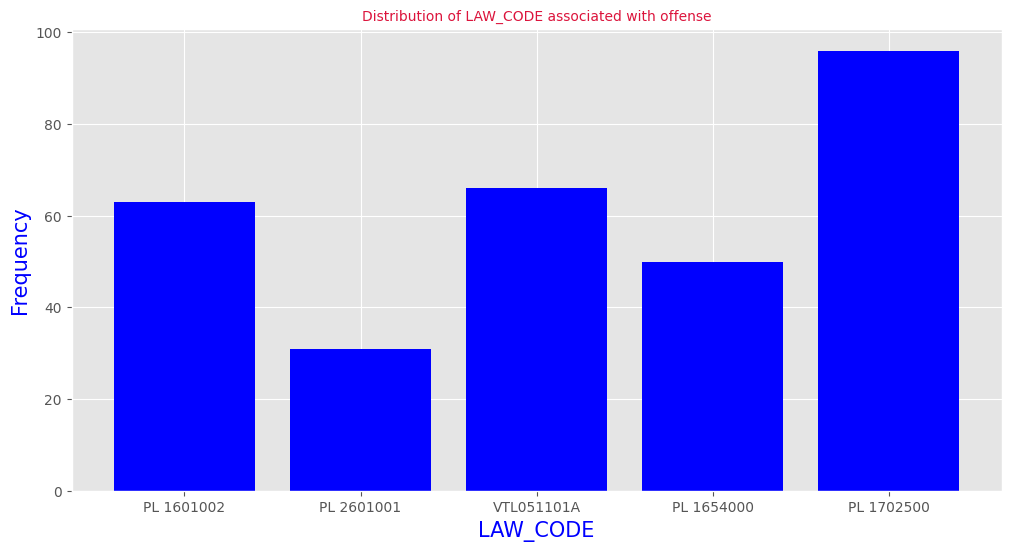

In [56]:
figure = plt.figure(figsize=(12,6))
plt.bar(law_code_data.iloc[:, 0], law_code_data.iloc[:, 1], color = 'Blue')
plt.title('Distribution of LAW_CODE associated with offense', color = 'Crimson', fontsize = 10)
plt.xlabel('LAW_CODE', color = 'blue', fontsize = 15)
plt.ylabel('Frequency', color = 'blue', fontsize = 15)


In [57]:
#Are there significant variations in arrest rates across different precincts? Which precincts have the highest and lowest arrest rates?
ARREST_PRECINCT = [77,73,62,32,71]
ARREST_RATE = np.random.randint(20, 80, size=len(ARREST_PRECINCT))
arrest_data = pd.DataFrame(data={'ARREST_PRECINCT':ARREST_PRECINCT, 'ARREST_RATE': ARREST_RATE})
print(arrest_data)

   ARREST_PRECINCT  ARREST_RATE
0               77           50
1               73           27
2               62           32
3               32           56
4               71           49


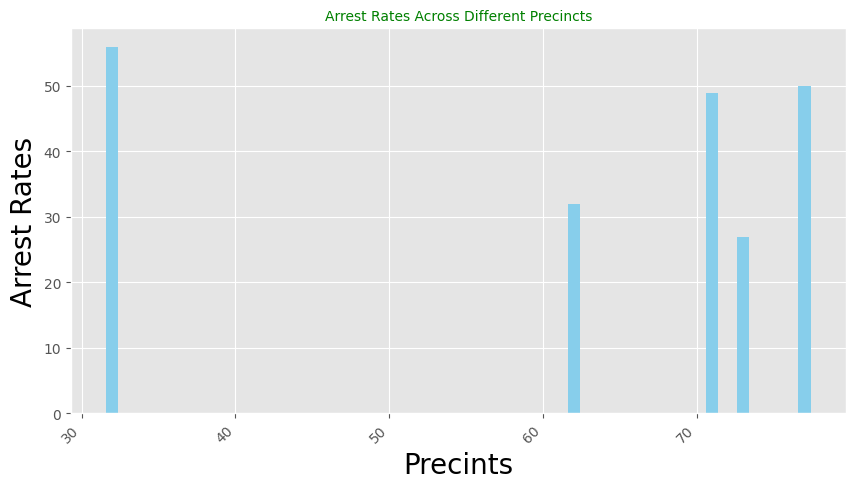

In [58]:
plt.figure(figsize=(10,5))
plt.bar(arrest_data.iloc[:, 0], arrest_data.iloc[:, 1], color = 'skyblue')
plt.title('Arrest Rates Across Different Precincts', color = 'green', fontsize = 10 )
plt.xlabel('Precints', color = 'Black', fontsize = 20)
plt.ylabel('Arrest Rates', color = 'Black', fontsize = 20)
plt.xticks(rotation=45, ha='right')
plt.show()

In [59]:
#What are the top penal codes leading to arrests, and how do they compare in terms of frequency?
num_records=1000
PD_CD = np.random.choice(['Panel_397', 'Panel_681', 'Panel_969', 'Panel_490', 'Panel_729'], size=num_records)
arrest_data = pd.DataFrame(data={'PD_CD': PD_CD})
print(arrest_data.head())

       PD_CD
0  Panel_969
1  Panel_397
2  Panel_397
3  Panel_969
4  Panel_397


In [60]:
PD_CD_counts = arrest_data['PD_CD'].value_counts()

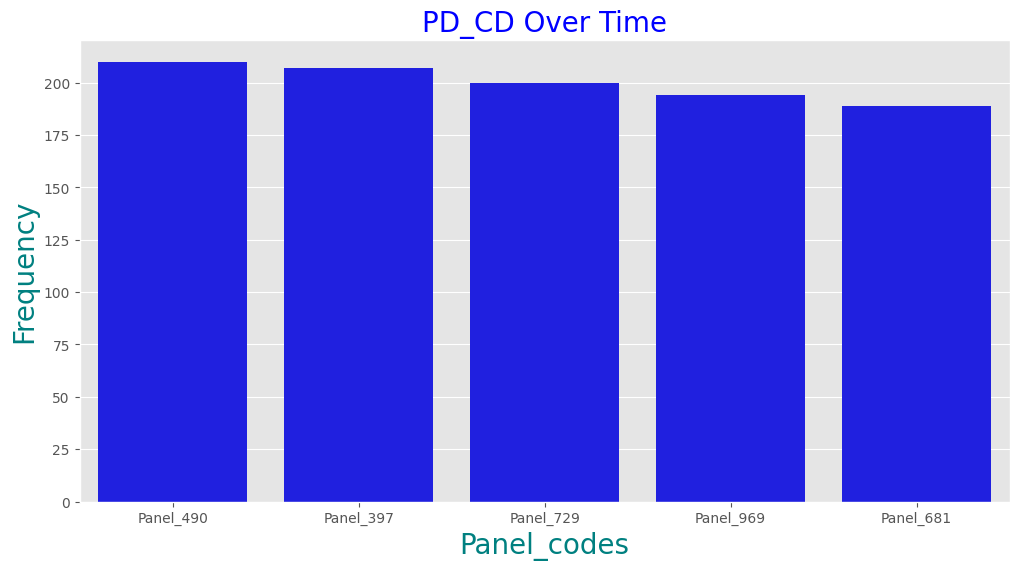

In [62]:
plt.figure(figsize=(12,6))
sns.barplot(x=PD_CD_counts.index, y = PD_CD_counts.values, color = 'Blue')
plt.title('PD_CD Over Time', color = 'blue', fontsize = 20)
plt.xlabel('Panel_codes', color = 'teal', fontsize = 20)
plt.ylabel('Frequency',color = 'teal', fontsize = 20)
plt.show()




In [ ]:
#On which days of the week are arrests most common? Are there specific patterns associated with certain days?
start_date = '2023-1-1'
end_date = '2023-7-28'
date = pd.date_range(start=start_date, end=end_date, freq = 'D')
timestamps= np.random.choice(date, size = 100)
arrest_data = pd.DataFrame(data={'timestamp': timestamps})
arrest_data['day_of_week'] = arrest_data['timestamp'].dt.day_name()
print(arrest_data.head())

   timestamp day_of_week
0 2023-07-07      Friday
1 2023-04-13    Thursday
2 2023-03-28     Tuesday
3 2023-04-15    Saturday
4 2023-07-27    Thursday


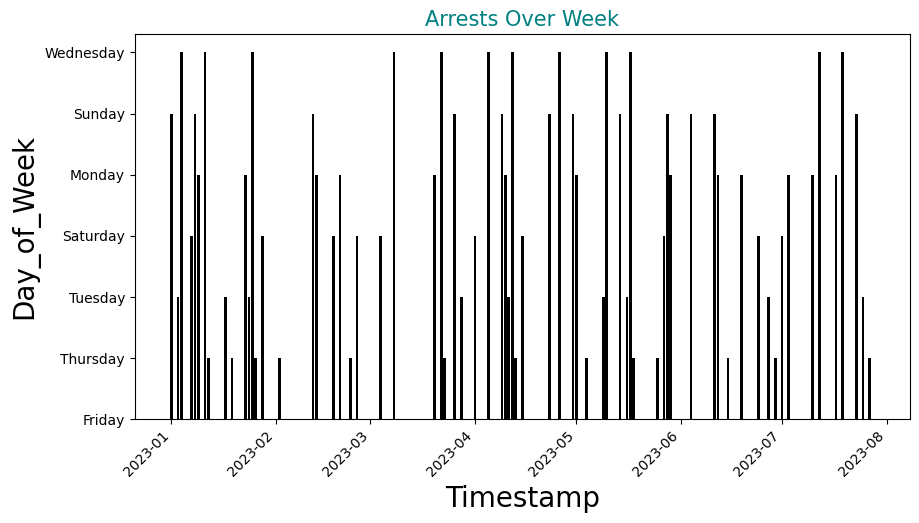

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(arrest_data['timestamp'], arrest_data['day_of_week'], color = 'black')
plt.title('Arrests Over Week', color = 'Teal', fontsize = 15)
plt.xlabel('Timestamp', color = 'black', fontsize = 20)
plt.ylabel('Day_of_Week',color = 'black', fontsize = 20)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#How do specific offenses trend over time? Are there seasonal variations or recurring patterns?
np.random.seed(40)
date = pd.date_range(start='2023-1-1', end='2023-7-28', freq='M')
OFNS_DESC = ['ROBBERY', 'CHILD, ENDAGERING WELFARE', 'STOLEN PROPERTY', 'TRAFFIC', 'FORGERY']
monthyly_data = pd.DataFrame({
          'timestamp': date,
          'OFNS_DESC': np.random.choice(OFNS_DESC, size=len(date)),
          'count': np.random.randint(10,50, size=len(date))
})
print(monthyly_data.head())

   timestamp                  OFNS_DESC  count
0 2023-01-31                    TRAFFIC     17
1 2023-02-28                    ROBBERY     29
2 2023-03-31                    ROBBERY     41
3 2023-04-30            STOLEN PROPERTY     20
4 2023-05-31  CHILD, ENDAGERING WELFARE     29


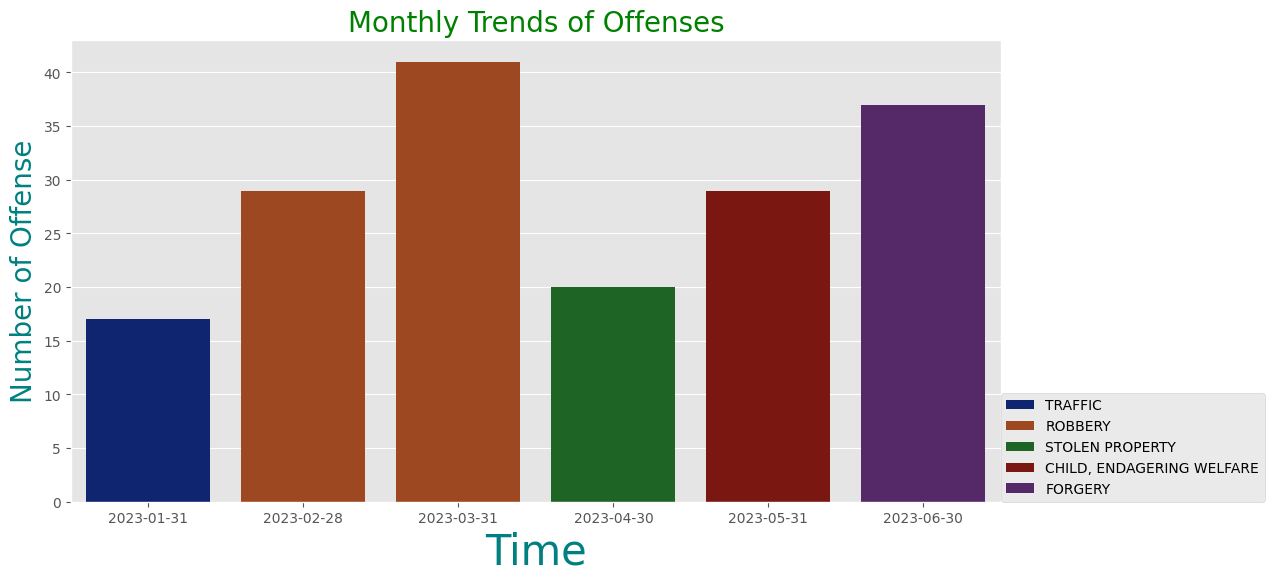

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='timestamp', y='count', hue='OFNS_DESC', data=monthyly_data, palette = 'dark')
plt.title('Monthly Trends of Offenses', color = 'green', fontsize = 20)
plt.xlabel('Time', color = 'teal', fontsize = 30)
plt.ylabel('Number of Offense', color = 'teal', fontsize = 20 )
plt.legend(loc=[1,0])
plt.show()

In [ ]:
#Which offenses are commonly associated with specific law codes, and are there correlations between them?
num_records = 1000
LAW_CODE = np.random.choice(['PL 1601002', 'PL 2601001', 'VTL051101A', 'PL 1654000', 'PL 1702500'], size=num_records)
offenses = np.random.choice (['ROBBERY', 'CHILD, ENDAGERING WELFARE', 'STOLEN PROPERTY', 'TRAFFIC', 'FORGERY'], size=num_records)
arrest_data = pd.DataFrame(data={'LAW_CODE': LAW_CODE, 'offense': offenses })
print(arrest_data.head())


     LAW_CODE                    offense
0  PL 2601001                    TRAFFIC
1  PL 1601002                    ROBBERY
2  PL 2601001  CHILD, ENDAGERING WELFARE
3  PL 2601001                    FORGERY
4  PL 1601002                    FORGERY


In [ ]:
crosstab = pd.crosstab(arrest_data['LAW_CODE'], arrest_data['offense'])
correlation_matrix = crosstab.corr()

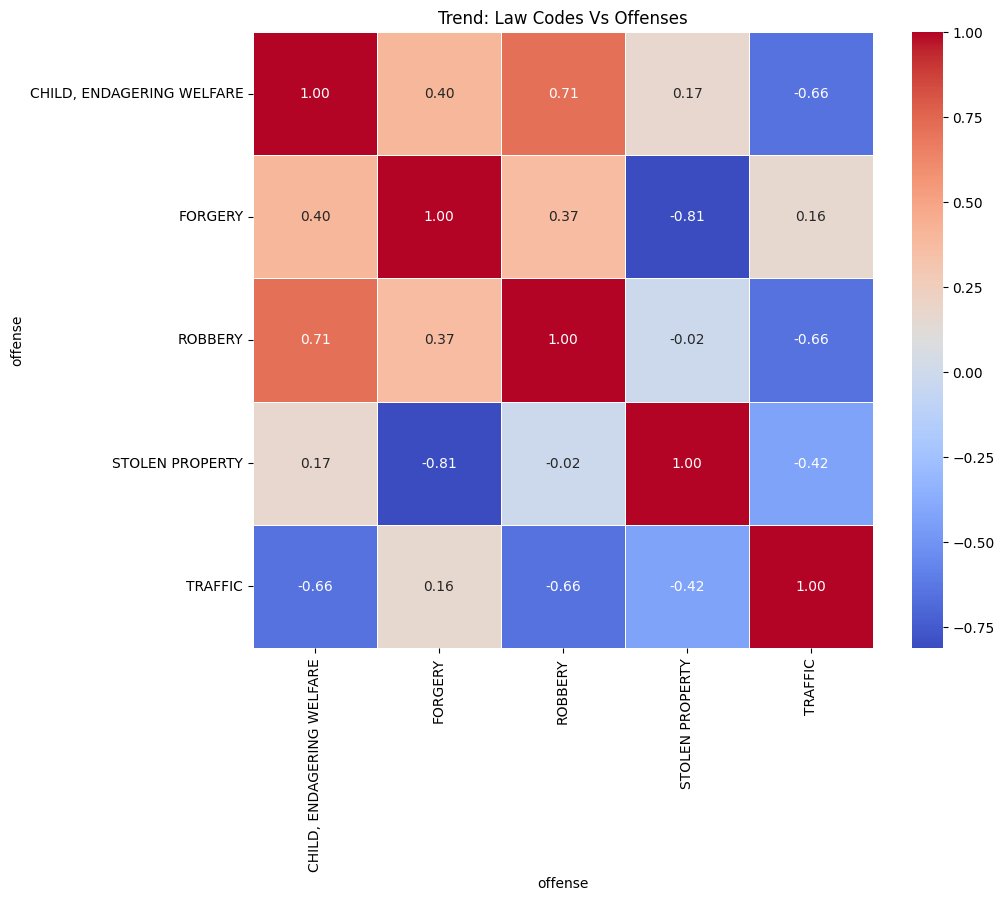

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Trend: Law Codes Vs Offenses')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

In [ ]:
import geopandas as gdp

In [ ]:
#Can we identify any geographical clusters or patterns in arrests based on precincts?
num_precincts = 15
precincts = np.arange(1, num_precincts + 1)
arrest_counts = np.random.randint(1, 90, size=num_precincts)
geometry = gdp.points_from_xy(np.random.uniform(-74.1, -73.8, size=num_precincts),
                              np.random.uniform(40.5, 40.8, size=num_precincts))
arrest_data = gdp.GeoDataFrame(data={'precincts': precincts, 'arrest_counts': arrest_counts},
                               geometry=geometry)
print(arrest_data)



    precincts  arrest_counts                    geometry
0           1             66  POINT (-73.96659 40.72528)
1           2             57  POINT (-74.07668 40.58406)
2           3             25  POINT (-73.99866 40.57469)
3           4             19  POINT (-73.97493 40.67997)
4           5              3  POINT (-73.92707 40.77680)
5           6             26  POINT (-73.87593 40.78692)
6           7             65  POINT (-73.80089 40.68175)
7           8             24  POINT (-73.86439 40.76534)
8           9             53  POINT (-73.91866 40.69081)
9          10             33  POINT (-73.94209 40.52941)
10         11             79  POINT (-74.06719 40.50049)
11         12             55  POINT (-74.06531 40.78667)
12         13             43  POINT (-74.01180 40.74763)
13         14             70  POINT (-74.02875 40.70644)
14         15              1  POINT (-74.09603 40.65196)


In [ ]:
arrest_data['x'] = arrest_data.geometry.x
arrest_data['y'] = arrest_data.geometry.y

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


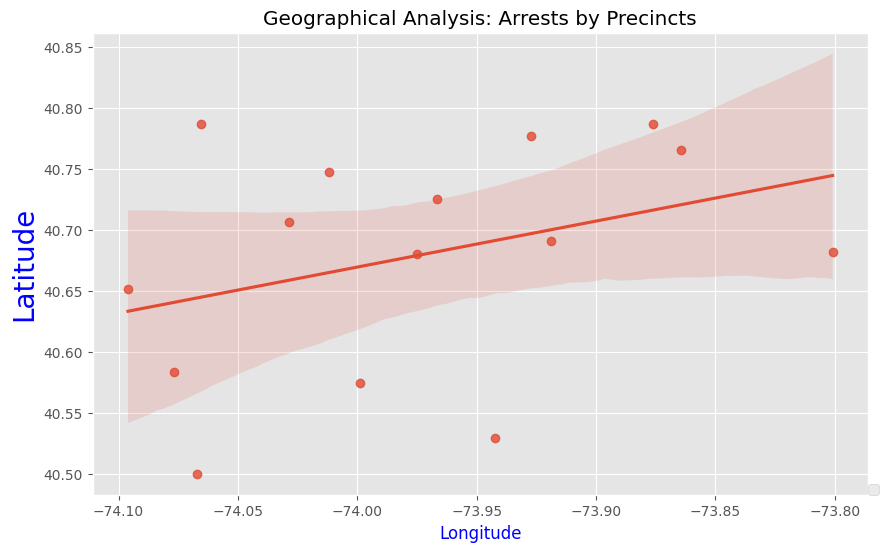

In [ ]:
plt.figure(figsize=(10, 6))
plt.style.use('ggplot')
sns.regplot(data=arrest_data, x='x', y='y')
plt.title('Geographical Analysis: Arrests by Precincts')
plt.xlabel('Longitude', color = 'Blue')
plt.ylabel('Latitude', color = 'Blue', fontsize = 20)
plt.legend(loc=[1,0])
plt.show()

In [ ]:
#Are there any interesting correlations between different columns, such as a correlation between certain offenses and arrest precincts?
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
encoder = LabelEncoder()
category = df.select_dtypes(include=['float','string'])
for x in category:
    df[x] = encoder.fit_transform(df[x])
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",5,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,11808,12623
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",15,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,8080,20058
2,263664549,02/15/2023,105,STRANGULATION 1ST,5,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,2306,3453
3,261345231,01/04/2023,105,STRANGULATION 1ST,5,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,29588,13090
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",5,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,10087,14339


In [ ]:
pd.factorize( ['FRAFFIC','CHILD ENDAGERING WELFARE', 'STOLEN PROPERTY', 'FELONY ASSAULT', 'FORGERY'] ) [0]

C:\Users\USER\AppData\Local\Temp\ipykernel_7516\3147873093.py:1: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.factorize( ['FRAFFIC','CHILD ENDAGERING WELFARE', 'STOLEN PROPERTY', 'FELONY ASSAULT', 'FORGERY'] ) [0]


array([0, 1, 2, 3, 4], dtype=int64)

In [ ]:
Data = pd.DataFrame ({
    'OFNS_DESC': [0,1,2,3,4],
     'ARREST_PRECINCT': ['77','73','62','32','71']
})
df = pd.DataFrame(Data)
print(Data)
print(Data['OFNS_DESC'].corr(Data['ARREST_PRECINCT']))
correlation_matrix = df.corr()
correlation_matrix





   OFNS_DESC ARREST_PRECINCT
0          0              77
1          1              73
2          2              62
3          3              32
4          4              71
-0.4609567108294432


,OFNS_DESC,ARREST_PRECINCT
OFNS_DESC,1.000000,-0.460957
ARREST_PRECINCT,-0.460957,1.000000


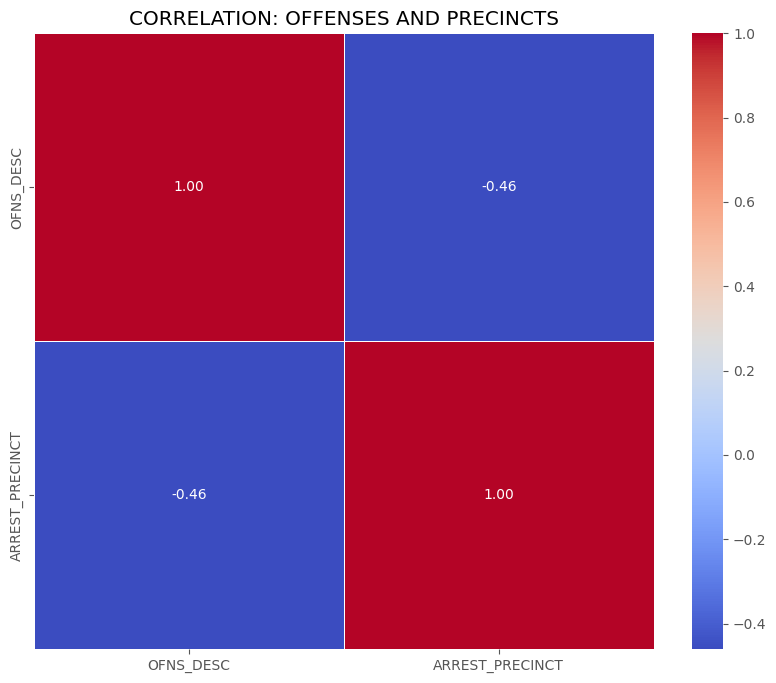

In [ ]:
plt.figure(figsize=(10,8))
plt.title('CORRELATION: OFFENSES AND PRECINCTS')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()